In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import cross_validation
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

C:\Users\Swetha\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [51]:
## Load the dataset
df = pd.read_excel("Concrete_Data.xls")

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [53]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [54]:
col_names = ["cement","slag","ash","water","superplastic","coarseagg","fineagg","age","strength"]
df.columns = col_names

In [55]:
df[df['age'] > 365]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


In [56]:
df[df['age'] < 1]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


In [57]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [58]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [59]:
# Inferences :
# Slag and ash, age has wide difference in mean and 50% values,indicating mean > median, so being a right tailed skewness in data.
# Also, slag and ash, superplastic has min value as 0, which cannot be in he composition of cement.
# in cement., min = 102, std = 104, range is 102 - 540, does the nearing value of std and min indicate something?
# In col Water , std is < min value, shuld we consider this variable for further analysis

# considering the difference b/w ( Q1,median ) and (Q3 and median) in columns slag,ash there are huge number of outliers.
# Other columns has very little diff b/w ( Q1,median ) and (Q3 and median), so there might be 1 or 2 outliers


The data does not contain any missing values or special symbols, but it has 0 value in few columns, which as t be treated.

In [60]:
# how to determine, in each column, with waht we should replace '0' with?
# For now, considering to replace the 

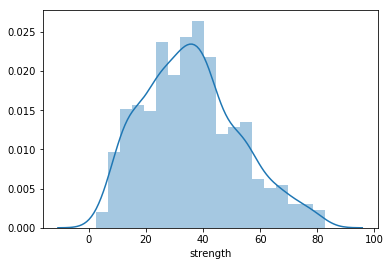

In [61]:
sns.distplot(df['strength'])

In [62]:
# The target variable has the distribution of data to be almost normal, but with lesser values on higher range, / higher values on lesser range
# Let us check the skewness:
print("Skewness = ",df['strength'].skew())

Skewness =  0.4169222822701877


It is positively, lightly skewed, as the skew value is < 0.5.
For analysis, we can log transform this variable for better analysis, optional.

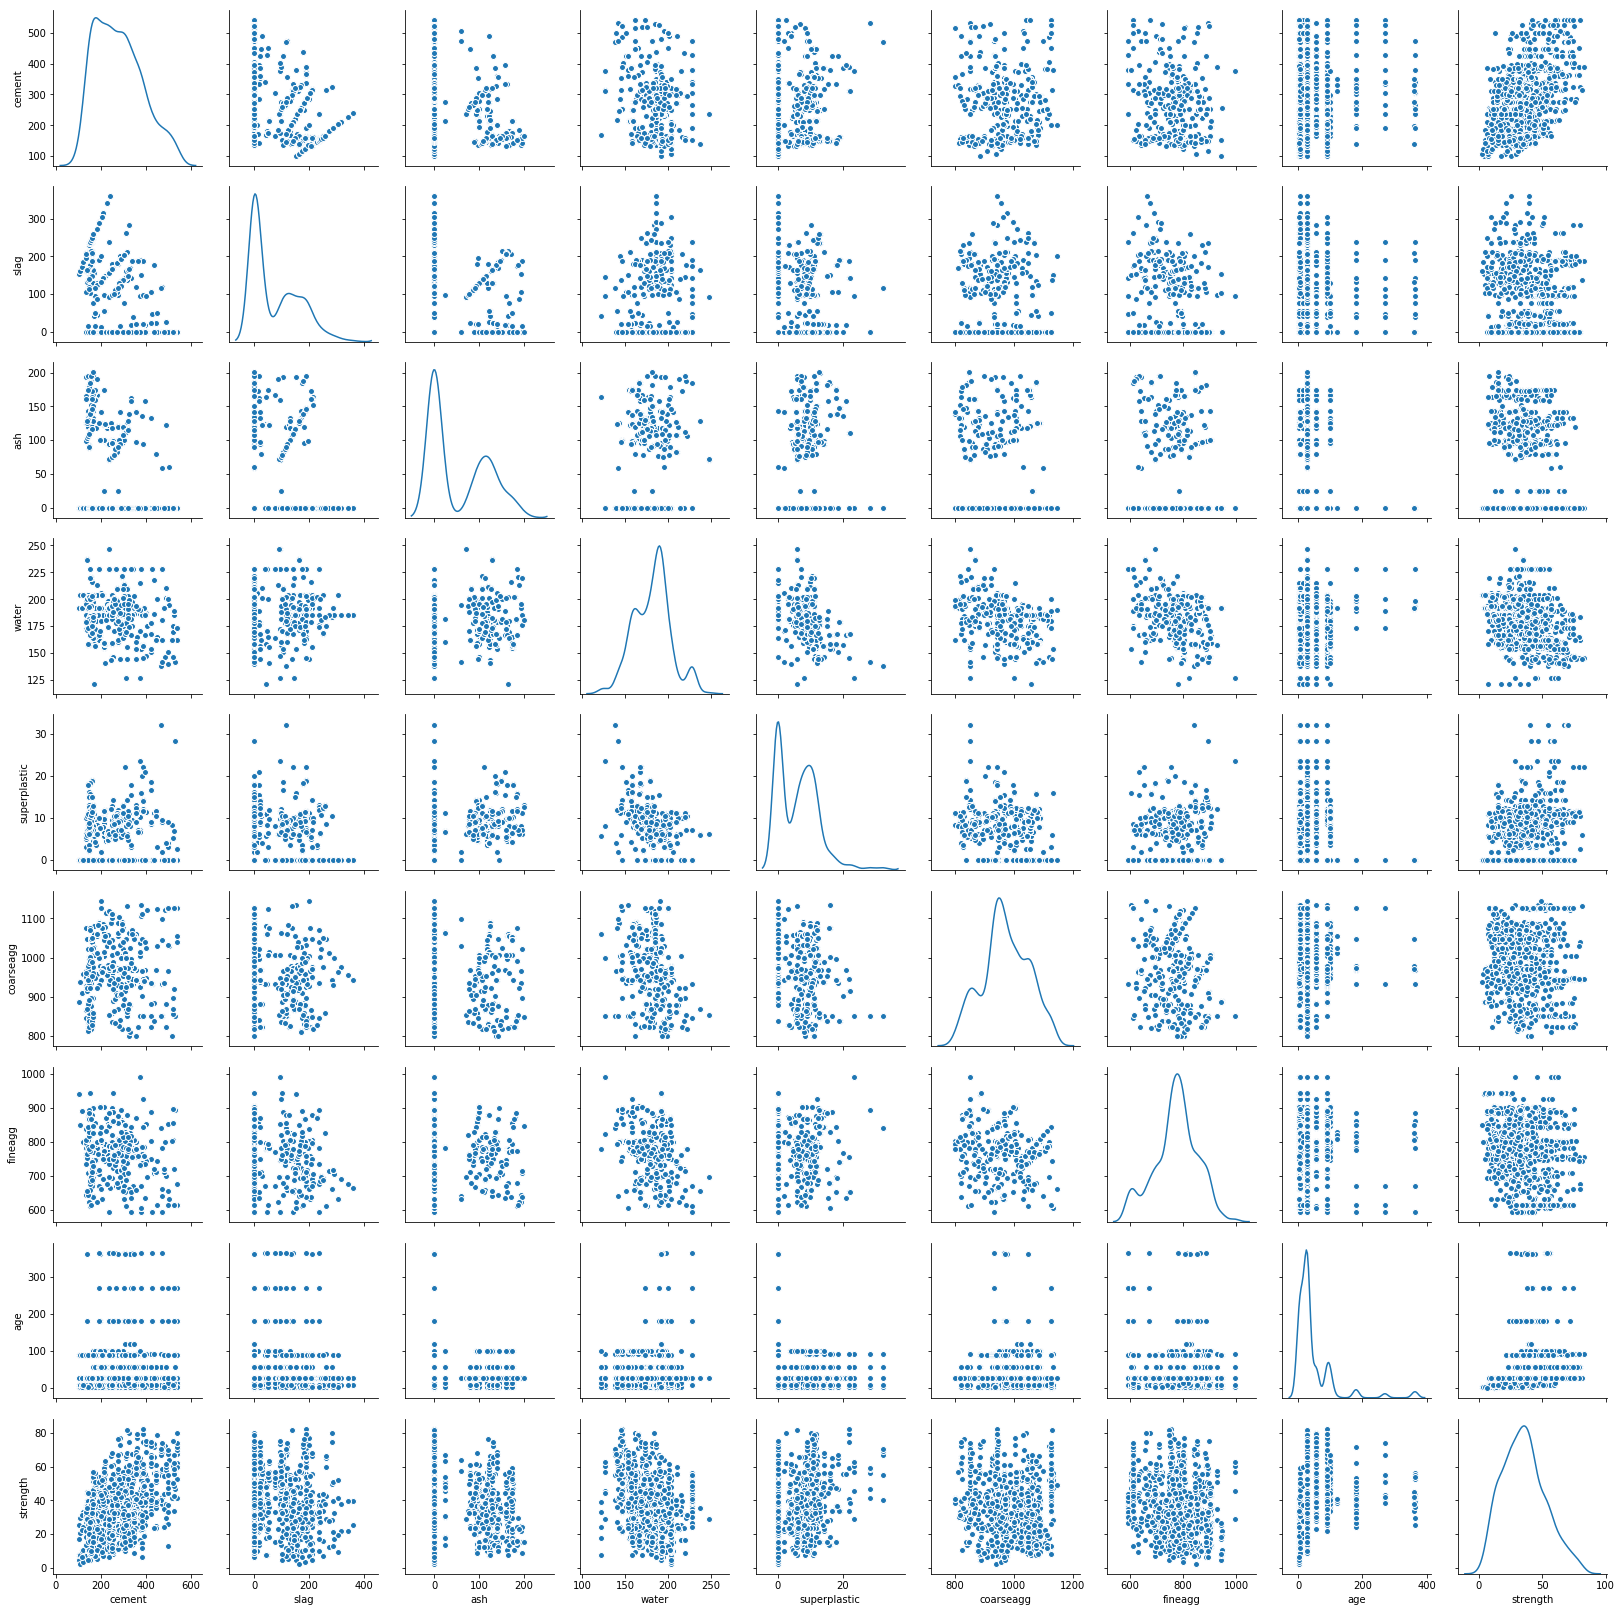

In [63]:
sns.pairplot(df, diag_kind='kde')

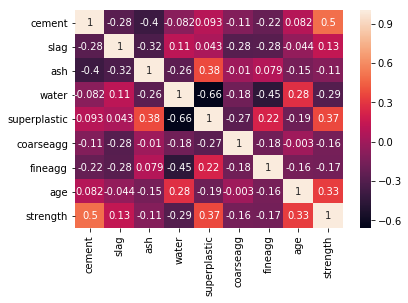

In [64]:
corr_DF = df.corr()
sns.heatmap(corr_DF, annot = True)

In [65]:
data_to_normalize = df.iloc[:,:-1]
scaler = MinMaxScaler()
scaler.fit_transform(data_to_normalize)

array([[1.        , 0.        , 0.        , ..., 0.69476744, 0.20572002,
        0.07417582],
       [1.        , 0.        , 0.        , ..., 0.73837209, 0.20572002,
        0.07417582],
       [0.52625571, 0.39649416, 0.        , ..., 0.38081395, 0.        ,
        0.73901099],
       ...,
       [0.10616438, 0.38786867, 0.54272864, ..., 0.26569767, 0.46663322,
        0.07417582],
       [0.1303653 , 0.51947691, 0.        , ..., 0.54825581, 0.48896136,
        0.07417582],
       [0.36278539, 0.27963272, 0.39130435, ..., 0.18459302, 0.42022077,
        0.07417582]])

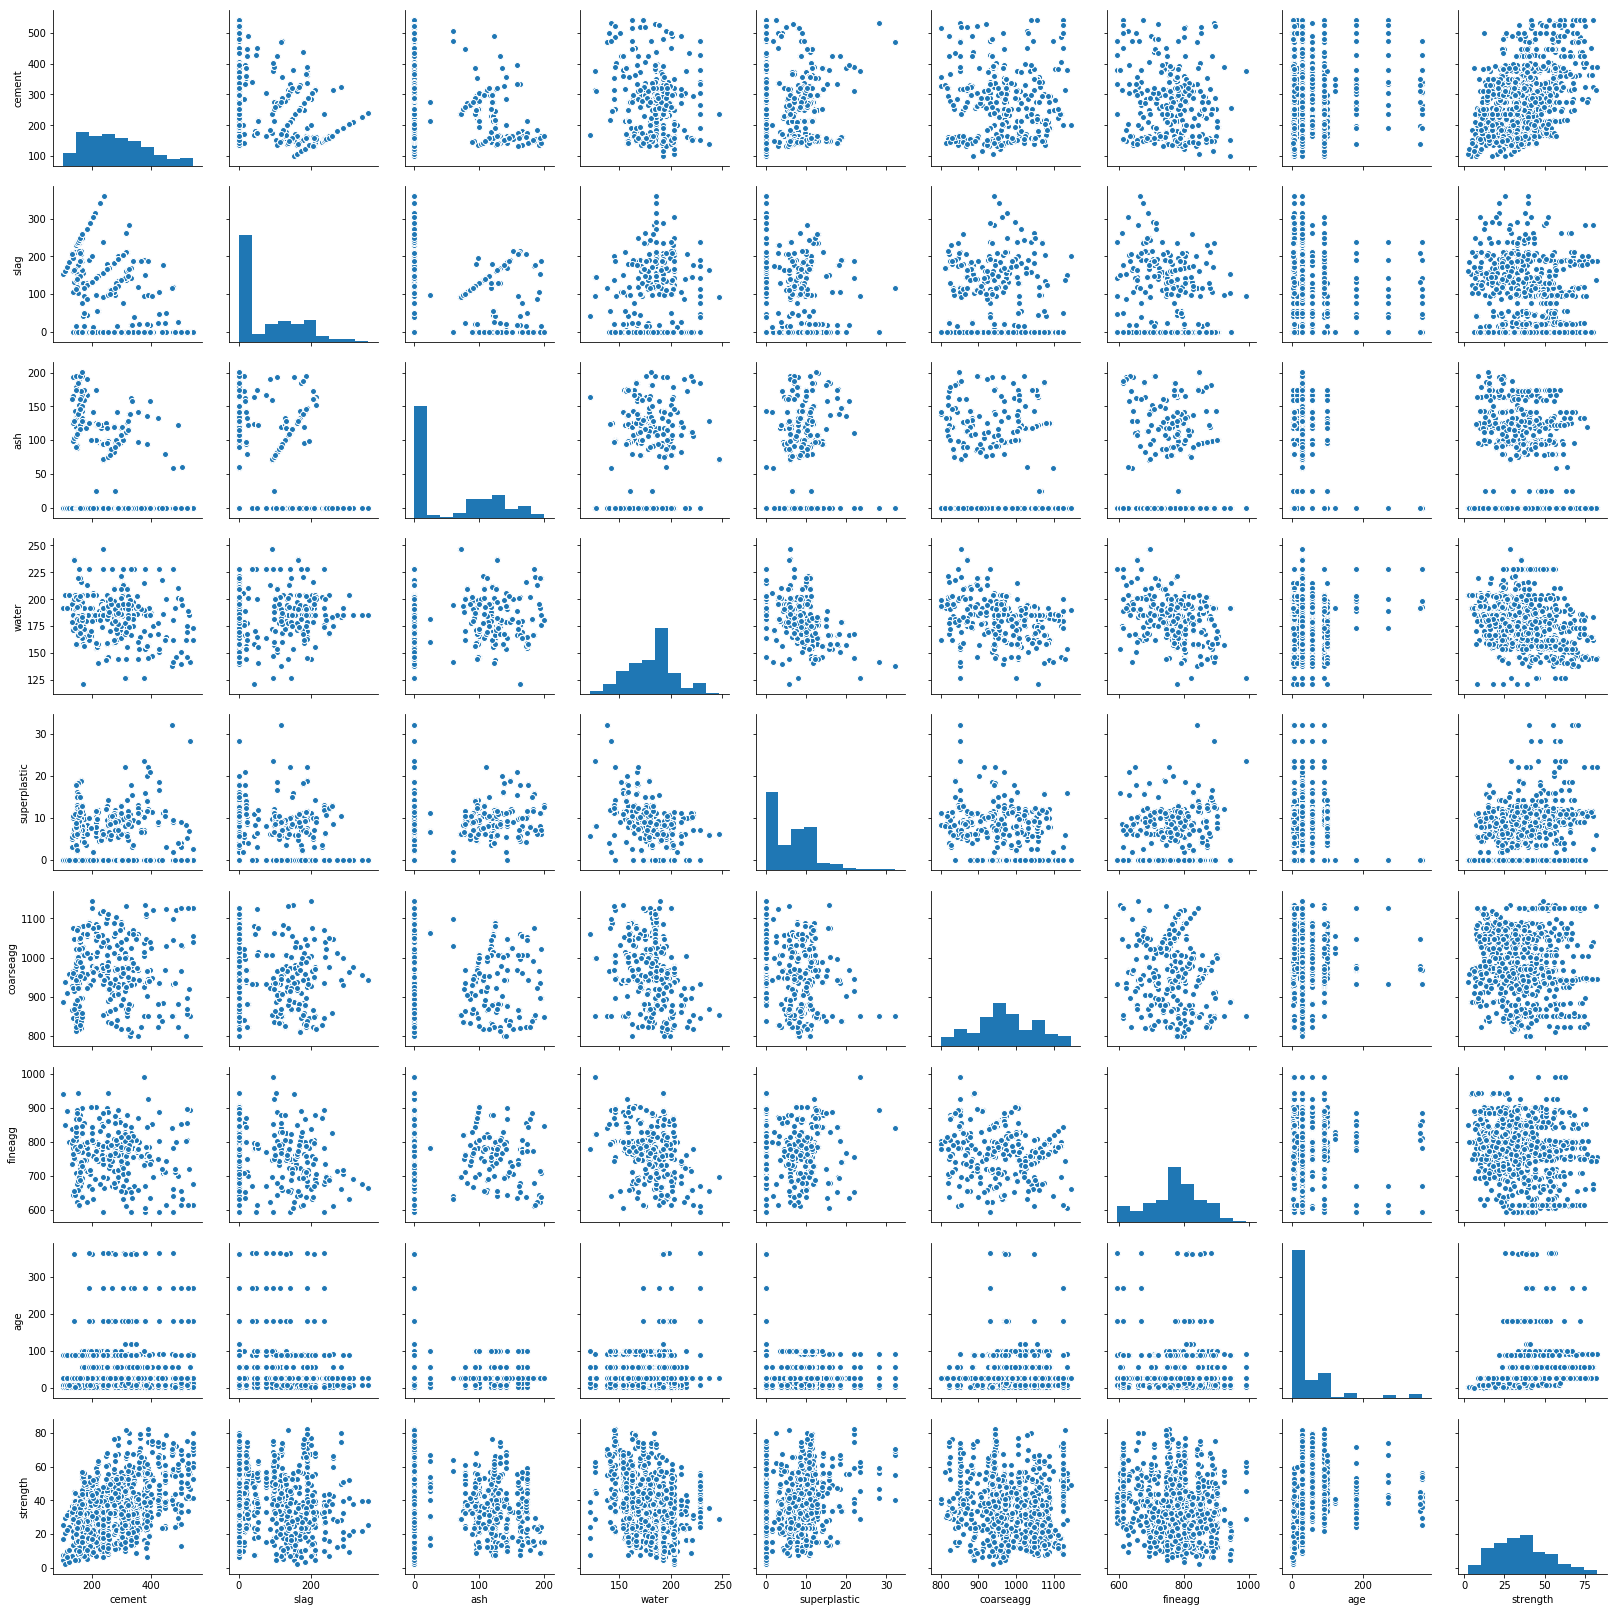

In [66]:
data_to_normalize['strength'] = df['strength']
sns.pairplot(data_to_normalize)

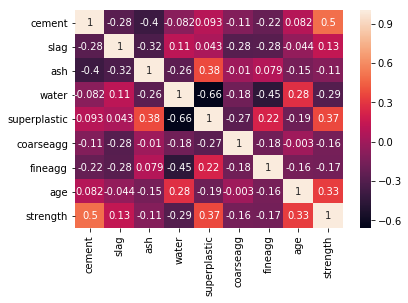

In [67]:
corr_normalised_Data = data_to_normalize.corr()
sns.heatmap(corr_normalised_Data, annot = True)

In [68]:
# The cement Strength can vary between min - 17Mpa , 18-28 Mpa and 28 - <70 Mpa,
#we can have df divided into three.

It is evident that cement and age, superplastic have good positive corr with strength, cement being the strong predictor
Water has a good negative correlation with Strength, where are there are other variables with very less correlation
there are good correlation amng variables :
cement -> Slag = -ve relation and strength-> +ve
Slag -> ash and fineaggg = -ve
Water -> superplastic , fineagg strength = -ve
superplastic -> ash and Strength
positive correlation between water and slag
age -> Strength and water

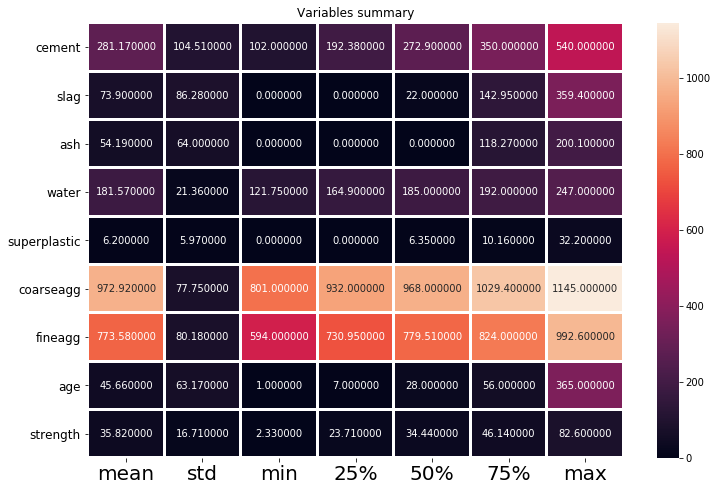

In [70]:
plt.figure(figsize=(12,8))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

In [74]:
def label(data):
    if data["age"] <= 30:
        return "1 month"
    if data["age"] > 30 and data["age"] <= 60 :
        return "2 months"
    if data["age"] > 60 and data["age"] <= 90 :
        return "3 months"
    if data["age"] > 90 and data["age"] <= 120 :
        return "4 months"
    if data["age"] > 120 and data["age"] <= 150 :
        return "5 months"
    if data["age"] > 150 and data["age"] <= 180 :
        return "6 months"
    if data["age"] > 180 and data["age"] <= 210 :
        return "7 months"
    if data["age"] > 210 and data["age"] <= 240 :
        return "8 months"
    if data["age"] > 240 and data["age"] <= 270 :
        return "9 months"
    if data["age"] > 270 and data["age"] <= 300 :
        return "10 months"
    if data["age"] > 300 and data["age"] <= 330 :
        return "11 months"
    if data["age"] > 330 :
        return "12 months"
df["age_months"] = df.apply(lambda df:label(df) , axis=1)

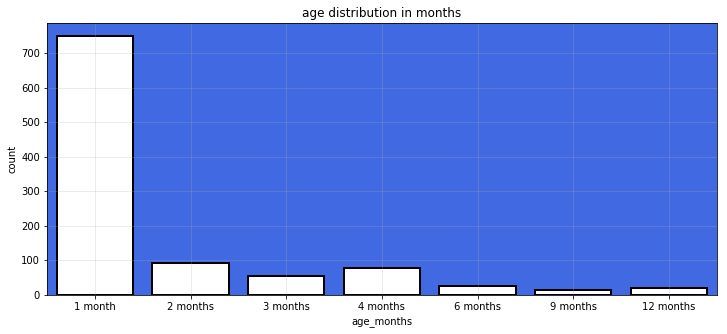

In [75]:
plt.figure(figsize=(12,5))
order = ['1 month','2 months', '3 months','4 months','6 months','9 months', '12 months']
ax = sns.countplot(df["age_months"],
                   order=order,linewidth=2,
                   edgecolor = "k"*len(order),
                   palette=["w"])
ax.set_facecolor("royalblue")
plt.title("age distribution in months")
plt.grid(True,alpha=.3)
plt.show()

In [77]:
df2 = df.copy(deep=True)
def lab(data2):
    if data2["strength"] <= 17:
        return "category 1"
    if data2["strength"] >17 and data2["strength"] <= 28 :
        return "category 2"
    if data2["strength"] >28 :
        return "category 3 "
    
df2["strength_category"] = df2.apply(lambda df2:lab(df2) ,axis =1)